## 🤖 Step 5.3.1: LSTM Forecasting for Power Consumption

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pickle
sns.set(style="whitegrid")

## 📥 Load Scaled Data

In [8]:
X_scaled = np.load('../Datasets/X_scaled.npy')
y_scaled = np.load('../Datasets/y_scaled.npy')

## ⏮️ Create Sequences for LSTM

In [9]:
time_steps = 24

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

## ✂️ Split into Train/Test

In [10]:
split_index = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

## 🧠 Build and Train LSTM Model

In [11]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32, callbacks=[es], verbose=1)

Epoch 1/30


c:\Users\Bahae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1176/1176 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - loss: 0.0088 - val_loss: 4.3092e-04
Epoch 2/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 4.9841e-04 - val_loss: 2.1736e-04
Epoch 3/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 3.3767e-04 - val_loss: 5.7813e-04
Epoch 4/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 2.5766e-04 - val_loss: 1.4222e-04
Epoch 5/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 2.0617e-04 - val_loss: 1.5150e-04
Epoch 6/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 1.6541e-04 - val_loss: 1.6096e-04
Epoch 7/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 1.5243e-04 - val_loss: 1.6696e-04
Epoch 8/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 1.4310e-04 - val_loss: 1.0953e-04
Epoch 9/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 1.3845e-04 - val_loss: 1.0730e-04
Epoch 10/30
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 1.2949e-04 - val_loss: 1.3381e-04
Epoch 11/30
1176/1176 ━━━━━━━━━━━━

## 🔮 Predict and Inverse Scale

In [12]:
y_pred_scaled = model.predict(X_test)
with open('../Scaler/y_scaler.pkl', 'rb') as f:
    y_scaler = pickle.load(f)

y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test)

327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


## 📉 Evaluate RMSE

In [13]:
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"LSTM RMSE: {rmse:.2f}")

LSTM RMSE: 890.89


## 📊 Plot Actual vs Predicted

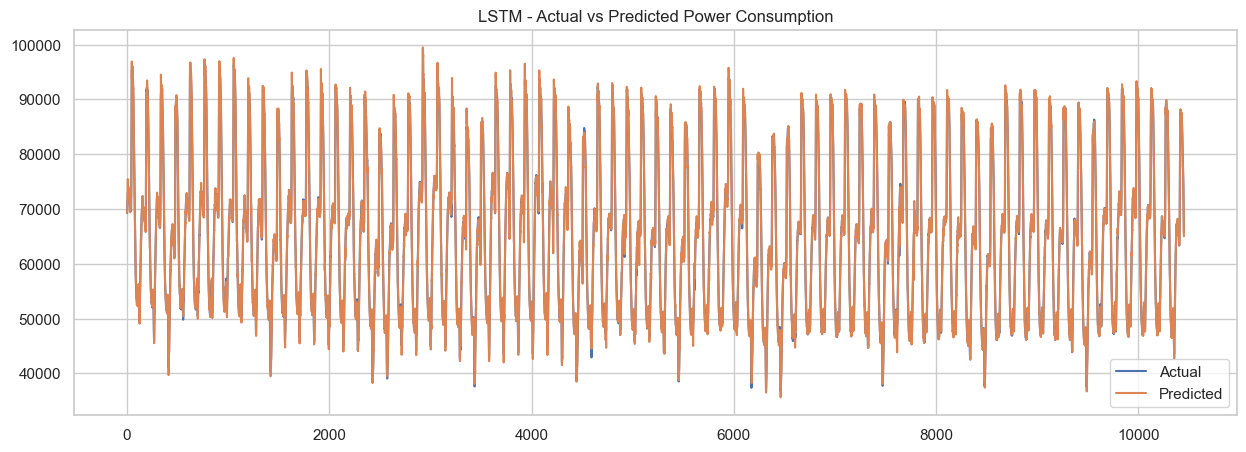

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM - Actual vs Predicted Power Consumption')
plt.legend()
plt.show()